In [1]:
from google.colab import files
files.upload()


Saving dataset.zip to dataset.zip


{'dataset.zip': b'PK\x03\x04\x14\x00\x00\x00\x00\x00\x18zo[\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11\x00\x00\x00dataset/diseased/PK\x03\x04\x14\x00\x00\x00\x08\x00\xd3yo[/\x85\xd05#L\x00\x00\xb3L\x00\x00\x1c\x00\x00\x00dataset/diseased/image1.jpeg\x9c\xb8UT\x1cN\xf0\xb69\x04\r\xae\x01\x82\x06\xf7\xe0\xee.\xc1\x19\xdc\x07\xb7\xc0\xe0\x10<\xd8d\x18\\\x83\x06\xd7\xe0\x0e\xc1\x07\x0b\xee\xee\x13\xdcI\xf0\xef\xf7\xff\xce\xca\xcd^\xecn\xf5eW\xf79Owu\xd5[\xfd\xba\xf4\xba\x05\xc0WUTQ\x04 !!\x01,\xff\x1b\x80\xd7U\x80\x1c\x00\x13\x1d\xfd-:\x1a\xe6[\x8c\xb7XX\x98\xd8x\xe4\xf8x\xb8\xb8x\xd4\xefH\t\xc9\x19h\x99\x18\xe9i\xe9\xe9X8E\xb8Y\xd8\x04\xd9\xe9\xe8y\xe5y\x05\xc5$\xa4\xa5\xa5\x99\xb8\x15\xd5\x14$UE\xa4\xa4%\xfeg\x13$,,,<\x1c<*||*\tVzV\x89\xff\xcf\xf6\xda\x03 \xc0\x00\xac!\xe9"#\xd1\x01\xde\x10 !\x13 \xbd\x0e\x00h\x00\x00$T\xa4\xffm\x80\xff\xc3\x90\xde \xa3\xa0\xa2\xa1c\xbc\xc5\xc4\xfa\xcf\xa1\t\x1f\xf0\x06\t\x19\xf9\r\n2**\n\xca\x7f\xb3A\xff\xcd\x03P\x08P\t?\xf0\xc8\xa0\x11i[\xa1\x

In [2]:
!unzip dataset.zip -d /content/data


Archive:  dataset.zip
   creating: /content/data/dataset/diseased/
  inflating: /content/data/dataset/diseased/image1.jpeg  
  inflating: /content/data/dataset/diseased/image10.jpeg  
  inflating: /content/data/dataset/diseased/image2.jpeg  
  inflating: /content/data/dataset/diseased/image3.jpeg  
  inflating: /content/data/dataset/diseased/image4.jpeg  
  inflating: /content/data/dataset/diseased/image5.jpeg  
  inflating: /content/data/dataset/diseased/image6.jpeg  
  inflating: /content/data/dataset/diseased/image7.jpeg  
  inflating: /content/data/dataset/diseased/image8.jpeg  
  inflating: /content/data/dataset/diseased/image9.jpeg  
   creating: /content/data/dataset/healthy/
  inflating: /content/data/dataset/healthy/leaf1.jpeg  
  inflating: /content/data/dataset/healthy/leaf10.jpeg  
  inflating: /content/data/dataset/healthy/leaf2.jpeg  
  inflating: /content/data/dataset/healthy/leaf3.jpeg  
  inflating: /content/data/dataset/healthy/leaf4.jpeg  
  inflating: /content/data/

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

data_dir = "/content/data/dataset"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train = datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=8,
    subset='training'
)

val = datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=8,
    subset='validation'
)

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train, validation_data=val, epochs=5)

model.save("tomato_model_simple.h5")


Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - accuracy: 0.5833 - loss: 1.0399 - val_accuracy: 0.5000 - val_loss: 4.5622
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.5000 - loss: 4.8106 - val_accuracy: 0.5000 - val_loss: 1.0185
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8333 - loss: 1.0570 - val_accuracy: 0.5000 - val_loss: 2.7052
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.5000 - loss: 1.9613 - val_accuracy: 0.5000 - val_loss: 1.4467
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.7917 - loss: 0.3368 - val_accuracy: 0.5000 - val_loss: 2.1777


In [5]:
model.save("tomato_model.h5")


In [4]:
from google.colab import files
test_image = files.upload()


Saving image1.jpeg to image1.jpeg


In [6]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your model
model = load_model("tomato_model.h5")

# Load image
img = image.load_img("image1.jpeg", target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediction
prediction = model.predict(img_array)
class_index = np.argmax(prediction)

classes = ["healthy", "diseased"]

print("Predicted class:", classes[class_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted class: healthy


In [7]:
from google.colab import files
test_image = files.upload()


Saving test.jpeg to test.jpeg


Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5000 - loss: 2.6859 - val_accuracy: 0.5000 - val_loss: 0.8221
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step - accuracy: 0.7917 - loss: 4.6422 - val_accuracy: 0.5000 - val_loss: 0.8466
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 450ms/step - accuracy: 0.5417 - loss: 8.2810 - val_accuracy: 0.5000 - val_loss: 0.6064
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 411ms/step - accuracy: 0.8333 - loss: 4.0833 - val_accuracy: 0.2500 - val_loss: 0.8808
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 425ms/step - accuracy: 0.8750 - loss: 2.3648 - val_accuracy: 0.2500 - val_loss: 0.7779
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 414ms/step - accuracy: 0.7917 - loss: 5.5446 - val_accuracy: 0.5000 - val_loss: 1.3197


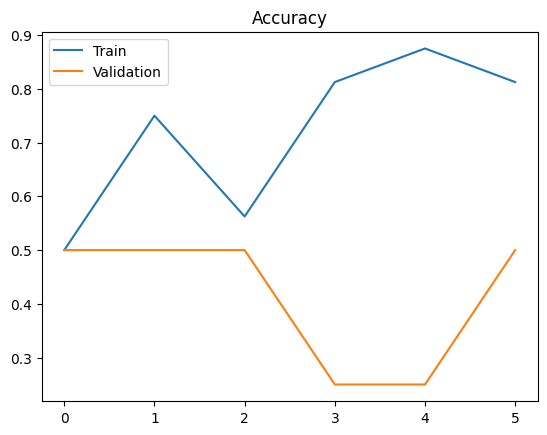

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

data_dir = "/content/data/dataset"

# Better data generator with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

train = datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=8,
    subset='training'
)

val = datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=8,
    subset='validation'
)

# Improved CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Stop training early if overfitting starts
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train, validation_data=val, epochs=15, callbacks=[early_stop])

# Save improved model
model.save("improved_tomato_model.h5")

# Plot Graphs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(["Train","Validation"])
plt.show()


In [11]:
from google.colab import files
uploaded = files.upload()   # upload test.jpg


Saving test.jpeg to test (1).jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


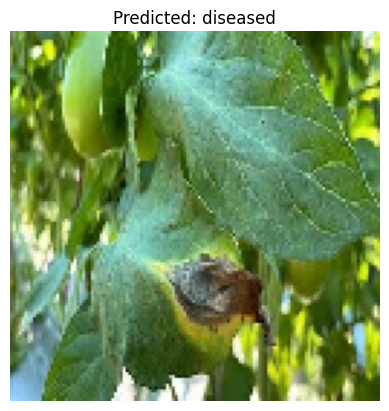

Predicted Class: diseased


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("improved_tomato_model.h5")

# Load and preprocess image
img = image.load_img("test.jpeg", target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediction
pred = model.predict(img_array)
class_index = np.argmax(pred)

classes = ["healthy", "diseased"]
predicted_class = classes[class_index]

# Show image + prediction
plt.imshow(img)
plt.title("Predicted: " + predicted_class)
plt.axis("off")
plt.show()

print("Predicted Class:", predicted_class)


In [16]:
from google.colab import files
uploaded = files.upload()


Saving leaf9.jpeg to leaf9.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


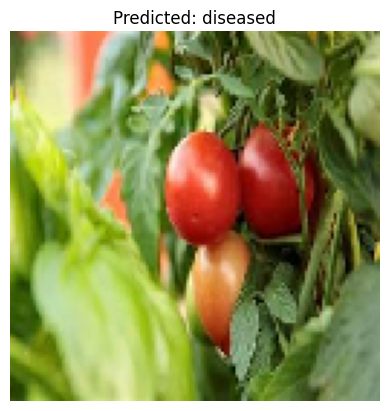

Predicted Class: diseased


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("improved_tomato_model.h5")

# Load and preprocess image
img = image.load_img("leaf9.jpeg", target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediction
pred = model.predict(img_array)
class_index = np.argmax(pred)

classes = ["healthy", "diseased"]
predicted_class = classes[class_index]

# Show image + prediction
plt.imshow(img)
plt.title("Predicted: " + predicted_class)
plt.axis("off")
plt.show()

print("Predicted Class:", predicted_class)


In [22]:
from google.colab import files
uploaded = files.upload()


Saving image6.jpeg to image6.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


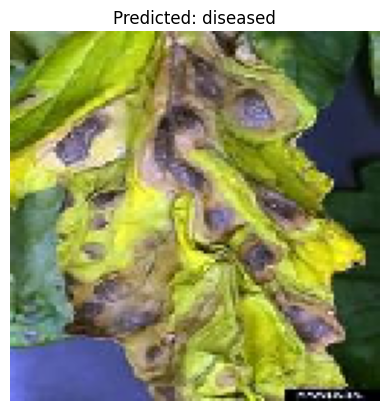

Predicted Class: diseased


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("improved_tomato_model.h5")

# Load and preprocess image
img = image.load_img("image6.jpeg", target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediction
pred = model.predict(img_array)
class_index = np.argmax(pred)

classes = ["healthy", "diseased"]
predicted_class = classes[class_index]

# Show image + prediction
plt.imshow(img)
plt.title("Predicted: " + predicted_class)
plt.axis("off")
plt.show()

print("Predicted Class:", predicted_class)


In [24]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [25]:
model.save("/content/drive/MyDrive/improved_tomato_model.h5")
